## Page Rank Algorithm

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Here we are computing PageRank using power iteration method. The compute_page_rank function takes the following arguments:

    1.adjacency_matrix (numpy.ndarray): Adjacency matrix representation of the graph.

    2.damping_factor (float): Damping factor, typically set to 0.85.
    
    3.epsilon (float): Convergence criterion.

    4.max_iterations (int): Maximum number of iterations.

The function plots the graph of webpages using matplotlib and prints a np array with PageRank scores for each node.

In [2]:
def compute_page_rank(adjacency_matrix, damping_factor=0.85, epsilon=1.0e-8, max_iterations=500):
    
    # Get the number of nodes
    num_nodes = adjacency_matrix.shape[0]

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
    plt.title("Graph of Web Pages")
    plt.show()
    
    # Initialize PageRank scores
    pagerank = np.ones(num_nodes) / num_nodes

    # Normalize columns of the adjacency matrix
    column_sum = np.sum(adjacency_matrix, axis=0)
    column_sum = column_sum.astype(adjacency_matrix.dtype)  # Ensure column_sum has the same dtype as adjacency_matrix
    adjacency_matrix /= column_sum[np.newaxis, :]
    adjacency_matrix = np.nan_to_num(adjacency_matrix)

    # Power iteration
    for _ in range(max_iterations):
        new_pagerank = (1 - damping_factor) / num_nodes + damping_factor * np.dot(adjacency_matrix, pagerank)
        # Check for convergence
        if np.max(np.abs(new_pagerank - pagerank)) < epsilon:
            break
        pagerank = new_pagerank

    # Rounding the page rank value to 3 decimal places for better readibility
    pagerank = [round(rank,3) for rank in pagerank]

    print("Page rank is:")
    print(pagerank) 


### Illustration with an Example

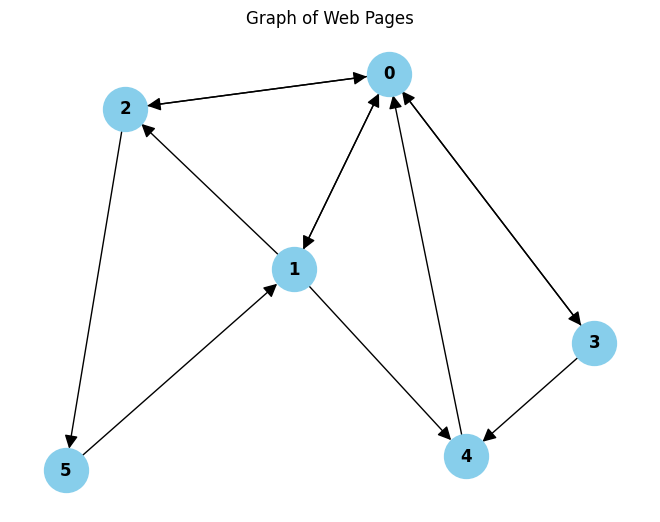

Page rank is:
[0.294, 0.202, 0.182, 0.125, 0.087, 0.111]


In [3]:
# Display Graph of web pages and Compute its PageRank
pagerank = compute_page_rank(np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0]
], dtype=float))